# Analyse Linear Logistic Regression

In [1]:
import numpy as np
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start = time.time()
cancer = load_breast_cancer()


X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, train_size=0.7, random_state=66)

regularization_parameter = 1 #(default)

clf = LogisticRegression(C=regularization_parameter)

clf.fit(X_train, y_train)

score_test =  clf.score(X_test, y_test)
score_train = clf.score(X_train,y_train)

print('Logistic regression test set score with C = %s regularization is %.3f'
      %(regularization_parameter,score_test))
print('Logistic regression training set score with C = %s regularization is %.3f'
      %(regularization_parameter,score_train))
print('time elapsed: %.3f [s]' % (time.time()-start))

Logistic regression test set score with C = 1 regularization is 0.953
Logistic regression training set score with C = 1 regularization is 0.972
time elapsed: 0.192 [s]


## print training and test score for different regularization strengths

In [2]:
coeffs = []
regul_params =  [0.01,1.,10000.] 
model_complexity = ['low','medium','high']

for regul in regul_params :
    
    clf = LogisticRegression(C=regul)
    logreg= clf.fit(X_train, y_train)

    score_test =  clf.score(X_test, y_test)
    score_train = clf.score(X_train,y_train)
    
    print('Logistic regression test set score with C = %s regularization is %.3f'
      %(regul,score_test))
    print('Logistic regression training set score with C = %s regularization is %.3f'
      %(regul,score_train))
    
    coeffs.append(logreg.coef_.T)

Logistic regression test set score with C = 0.01 regularization is 0.930
Logistic regression training set score with C = 0.01 regularization is 0.940
Logistic regression test set score with C = 1.0 regularization is 0.953
Logistic regression training set score with C = 1.0 regularization is 0.972
Logistic regression test set score with C = 10000.0 regularization is 0.959
Logistic regression training set score with C = 10000.0 regularization is 0.977


## Plot the coefficients of each feature for the different regularization strengths

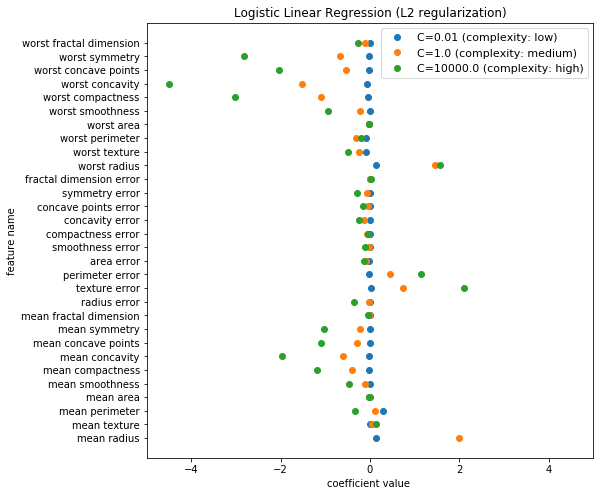

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title('Logistic Linear Regression (L2 regularization)')
for i, C in enumerate(regul_params) :
    plt.plot(coeffs[i], range(len(coeffs[i])), 'o', label="C=%s (complexity: %s)"%(C,model_complexity[i]))

plt.yticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=0)
plt.ylabel('feature name')
plt.xlabel('coefficient value ')
plt.xlim(-5, 5)
plt.legend(fontsize=11)
plt.show()

## Repeat printing scores coefficient plot with L1 (Lasso) regularization

In [4]:
coeffs = []
regul_params =  [0.01,1.,100.] 
model_complexity = ['low','medium','high']
for regul in regul_params :
    
    clf = LogisticRegression(C=regul, penalty='l1')
    logreg= clf.fit(X_train, y_train)

    score_test =  clf.score(X_test, y_test)
    score_train = clf.score(X_train,y_train)
    
    print('Logistic regression test set score with C = %s regularization is %.3f'
      %(regul,score_test))
    print('Logistic regression training set score with C = %s regularization is %.3f'
      %(regul,score_train))
    
    coeffs.append(logreg.coef_.T)

Logistic regression test set score with C = 0.01 regularization is 0.924
Logistic regression training set score with C = 0.01 regularization is 0.915
Logistic regression test set score with C = 1.0 regularization is 0.953
Logistic regression training set score with C = 1.0 regularization is 0.970
Logistic regression test set score with C = 100.0 regularization is 0.977
Logistic regression training set score with C = 100.0 regularization is 0.995


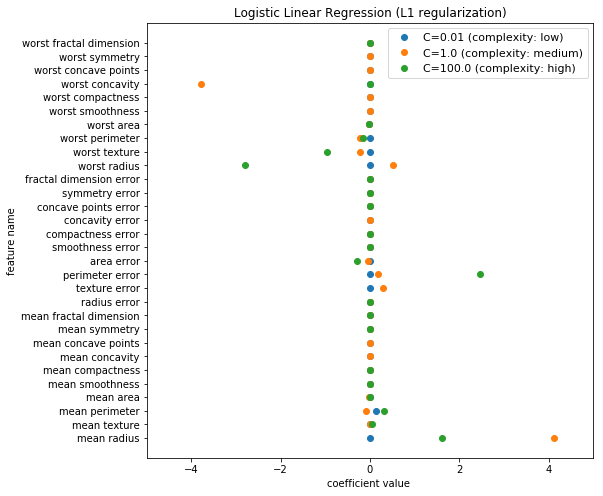

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title('Logistic Linear Regression (L1 regularization)')
for i, C in enumerate(regul_params) :
    plt.plot(coeffs[i], range(len(coeffs[i])), 'o', label="C=%s (complexity: %s)"%(C,model_complexity[i]))

plt.yticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=0)
plt.ylabel('feature name')
plt.xlabel('coefficient value ')
plt.xlim(-5, 5)
plt.legend(fontsize=11)
plt.show()